In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    # print(filename)
    label = filename.split('_')[-1]
    # print(label)
    label = label.split('.')[0]
    labels.append(label.lower())
print('Dataset is Loaded')


Dataset is Loaded


In [ ]:
paths[:5]

['/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_angry/YAF_bought_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_angry/YAF_base_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_angry/YAF_burn_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_angry/YAF_bar_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_angry/YAF_back_angry.wav']

In [ ]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [ ]:
##create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS Toronto emotional ...,angry
1,/content/drive/MyDrive/TESS Toronto emotional ...,angry
2,/content/drive/MyDrive/TESS Toronto emotional ...,angry
3,/content/drive/MyDrive/TESS Toronto emotional ...,angry
4,/content/drive/MyDrive/TESS Toronto emotional ...,angry


In [ ]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.5403134e+02,  5.3507679e+01, -6.6787190e+00,  3.2752794e-01,
       -2.9446516e+01,  6.3578453e+00,  4.1013818e+00, -1.9642618e+01,
       -2.0833244e+00,  1.7922984e+00, -1.4493582e+01,  9.1661568e+00,
       -9.8589067e+00,  5.4053144e+00,  1.3328303e-01, -8.5065470e+00,
        1.5562576e+00,  1.3521976e+00, -7.5838165e+00,  3.5279758e+00,
       -2.3671410e+00, -2.6570652e+00, -2.8023188e+00, -1.2182224e+00,
       -3.4724441e-01,  7.5056272e+00,  1.0552016e+01,  1.1414539e+01,
        1.1704172e+01,  7.9567084e+00,  8.4932804e-01,  2.3558936e+00,
       -2.5685732e+00,  2.7504137e+00,  1.6989278e+00, -1.0697829e+00,
       -2.2785194e+00, -2.8954208e+00,  1.9441764e+00,  3.8444636e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-354.03134, 53.50768, -6.678719, 0.32752794, ...
1       [-329.51895, 22.86458, 1.3039654, 8.73677, -19...
2       [-316.56366, 109.3681, -7.4545336, -4.5025764,...
3       [-323.86, 70.17526, -5.0372443, -14.311751, -3...
4       [-339.3216, 50.24379, -21.820583, 13.099628, -...
                              ...                        
5595    [-428.04822, 57.957573, 1.2415637, 37.944313, ...
5596    [-374.48767, 72.036545, 12.567796, 18.573978, ...
5597    [-409.49863, 89.658905, -4.345877, 25.175097, ...
5598    [-420.40222, 80.02803, 6.293351, 32.179897, 2....
5599    [-391.8462, 100.0138, -3.7448769, 24.643173, 1...
Name: speech, Length: 5600, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape()

TypeError: 'tuple' object is not callable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64)


Epoch 1/50
56/56 [==============================] - 10s 188ms/step - loss: 3.7139e-04 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 0.9944
Epoch 2/50
56/56 [==============================] - 10s 177ms/step - loss: 3.1335e-04 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 0.9955
Epoch 3/50
56/56 [==============================] - 8s 140ms/step - loss: 1.7517e-04 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 0.9967
Epoch 4/50
56/56 [==============================] - 8s 144ms/step - loss: 1.7335e-04 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9967
Epoch 5/50
56/56 [==============================] - 7s 134ms/step - loss: 1.5391e-04 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 0.9967
Epoch 6/50
56/56 [==============================] - 8s 145ms/step - loss: 1.1441e-04 - accuracy: 1.0000 - val_loss: 0.0316 - val_accuracy: 0.9967
Epoch 7/50
56/56 [==============================] - 8s 145ms/step - loss: 1.4551e-04 - accuracy: 1.0000 - val_loss: 0.0318

In [ ]:
y_pred = model.predict(X_test)


35/35 [==============================] - 1s 20ms/step


In [ ]:
predicted_labels = np.argmax(y_pred, axis=1)


In [ ]:
true_labels = np.argmax(y_test, axis=1)


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       150
           1       0.95      1.00      0.97       174
           2       1.00      1.00      1.00       182
           3       0.99      0.98      0.99       159
           4       1.00      1.00      1.00       151
           5       0.99      0.94      0.97       142
           6       1.00      0.99      0.99       162

    accuracy                           0.99      1120
   macro avg       0.99      0.99      0.99      1120
weighted avg       0.99      0.99      0.99      1120



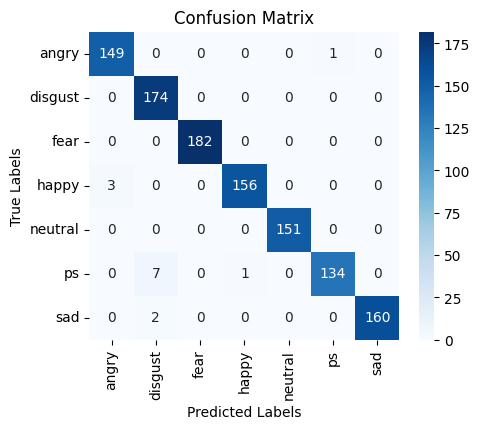

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=enc.categories_[0], yticklabels=enc.categories_[0])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)


Accuracy: 0.9875
